# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardsir


Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | san jose del cabo
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | borzya
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | olinda
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | wuwei
Processing Record 17 of Set 1 | center
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | igarka
Processing Record 21 of Set 1 | ahau
City not found. Skipping...
Processing Record 22 of Set 1 | pangani
Processing Record 23 of Set 1 | yayva
Processing Record 24 of Set 1 | lebu
Processing Record 25 o

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bardsir,29.9227,56.5743,50.16,28,3,2.37,IR,1699839554
1,port-aux-francais,-49.3500,70.2167,39.81,76,100,4.29,TF,1699839554
2,waitangi,-43.9535,-176.5597,54.79,89,100,18.84,NZ,1699839555
3,college,64.8569,-147.8028,12.15,85,40,6.91,US,1699839372
4,san jose del cabo,23.0589,-109.6977,81.73,67,40,10.36,MX,1699839555


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardsir,29.9227,56.5743,50.16,28,3,2.37,IR,1699839554
1,port-aux-francais,-49.3500,70.2167,39.81,76,100,4.29,TF,1699839554
2,waitangi,-43.9535,-176.5597,54.79,89,100,18.84,NZ,1699839555
3,college,64.8569,-147.8028,12.15,85,40,6.91,US,1699839372
4,san jose del cabo,23.0589,-109.6977,81.73,67,40,10.36,MX,1699839555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

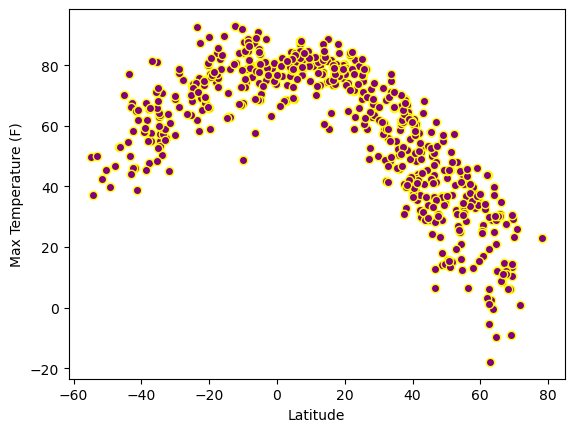

In [55]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, edgecolor="yellow", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

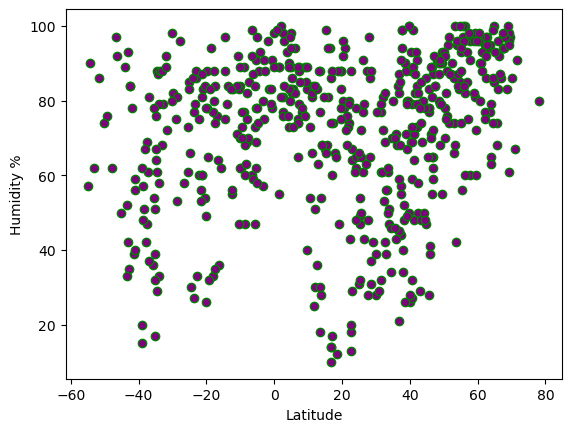

In [56]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, edgecolor="green", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/latvhumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

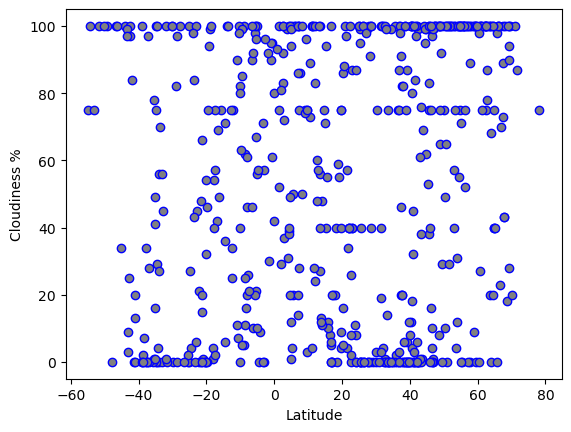

In [57]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor="blue", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/latvcloudy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

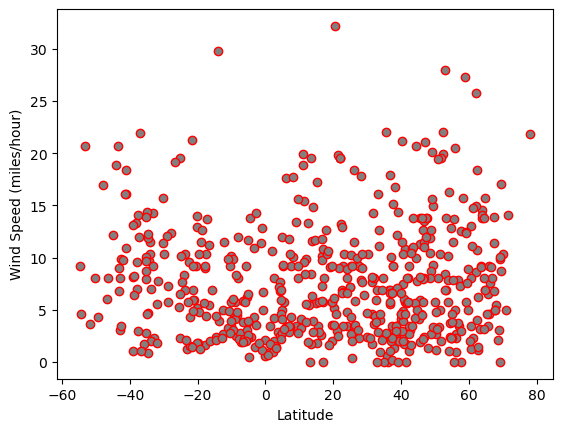

In [58]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, edgecolor="red", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.011434085331158469


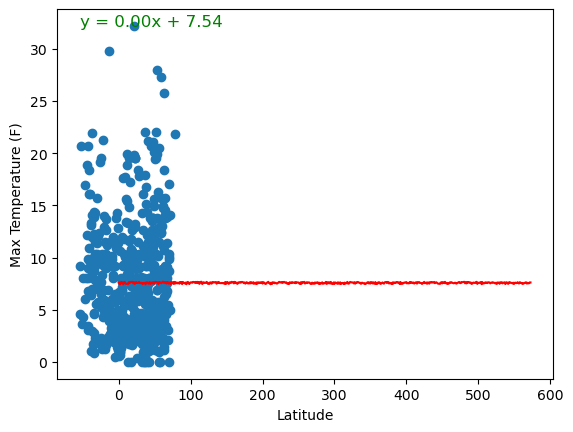

In [85]:
# Define a function to create Linear Regression plots

def Regression_scatter(weatherdata, xCol, yCol, xLabel, yLabel):
    x = weatherdata[xCol]
    y = weatherdata[yCol]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")

plt.plot(regression, color="red", label= f'regression line: y = {slope:.2f}x + {intercept:.2f}')
plt.scatter(x, y)
#plt.annotate(line_eq,(20,36), fontsize=8)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)

plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardsir,29.9227,56.5743,50.16,28,3,2.37,IR,1699839554
3,college,64.8569,-147.8028,12.15,85,40,6.91,US,1699839372
4,san jose del cabo,23.0589,-109.6977,81.73,67,40,10.36,MX,1699839555
5,albany,42.6001,-73.9662,29.73,79,0,3.04,US,1699839305
7,borzya,50.3833,116.5167,15.78,78,10,2.68,RU,1699839555


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,39.81,76,100,4.29,TF,1699839554
2,waitangi,-43.9535,-176.5597,54.79,89,100,18.84,NZ,1699839555
6,ushuaia,-54.8000,-68.3000,49.66,57,75,9.22,AR,1699839314
9,olinda,-8.0089,-34.8553,80.33,69,20,8.05,BR,1699839555
10,margaret river,-33.9500,115.0667,70.88,58,56,11.45,AU,1699839556


###  Temperature vs. Latitude Linear Regression Plot

In [87]:
# Linear regression on Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


In [80]:
# Linear regression on Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [81]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


In [82]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [83]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


In [84]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.011434085331158469


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [68]:
# Northern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

In [69]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE